#### 라이브러리와 app 데이터 세트 로딩

In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
#import warning
%matplotlib inline

#warning.ignorewarning(...)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

In [4]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### TARGET 값 분포 및 AMT_INCOME_TOTAL 값 Histogram
* TARGET값 별 분포도, Pandas, Matplotlib, Seaborn으로 histogram 표현

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
# study

app_train['TARGET'].value_counts() / app_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

<AxesSubplot:>

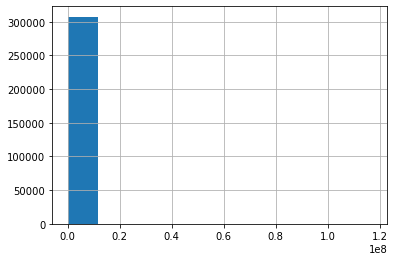

In [13]:
# pandas's hist()

app_train['AMT_INCOME_TOTAL'].hist()

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <BarContainer object of 10 artists>)

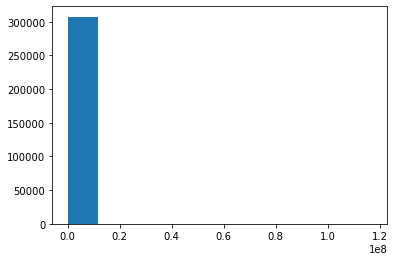

In [20]:
# plt.hist()

plt.hist(app_train['AMT_INCOME_TOTAL'])

In [ ]:
# seaborn(sns)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

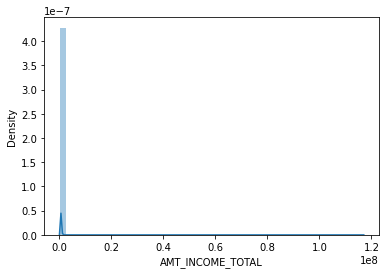

In [18]:
# distplot : histogram 그릴 때, sns는 밑에 한 라인이라도 보여주고 있음.

sns.distplot(app_train['AMT_INCOME_TOTAL'])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

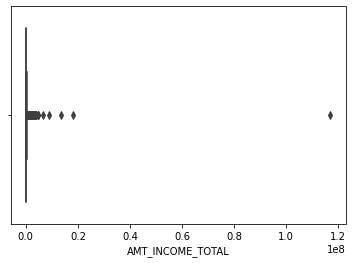

In [19]:
# boxplot : skew된 데이터볼 때 sns의 boxplot보면 분위로 보여줘서 편함.

# 4분위로 보여주고 있음

sns.boxplot(app_train['AMT_INCOME_TOTAL'])

#### AMT_INCOME_TOTAL이 1000000 이하인 값에 대한 분포도 
* boolean indexing으로 filtering 후 histogram 표현

<AxesSubplot:>

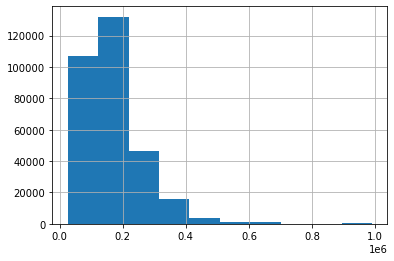

In [21]:
# boolean indexing 으로 filtering 적용 
app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'].hist()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

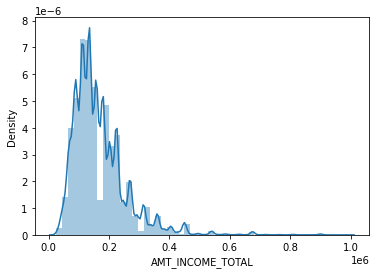

In [23]:
# distplot으로 histogram 표현 
sns.distplot(app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'])

#### TARGET 값에 따른 AMT_INCOME_TOTAL값 분포도 비교
* distplot과 violinplot 시각화
* plt.subplots() 기반으로 seaborn의 distplot과 violinplot으로 분포도 비교 시각화

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

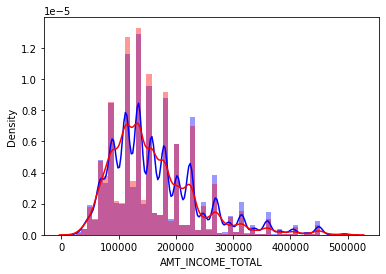

In [24]:
# TARGET값에 따른 Filtering 조건 각각 설정. 
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)

# AMT_INCOME_TOTAL은 매우 큰 값이 있는데, 이는 제외.
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)

# distplot으로 TARGET=1이면 빨간색으로, 0이면 푸른색으로 Histogram 표현 
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='red')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

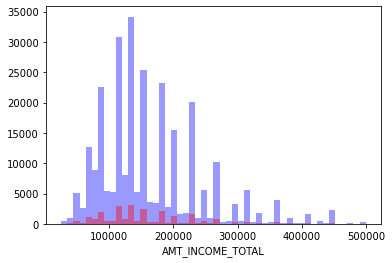

In [25]:
# study : "kde=False" option

# TARGET값에 따른 Filtering 조건 각각 설정. 
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)

# AMT_INCOME_TOTAL은 매우 큰 값이 있는데, 이는 제외.
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)

# distplot으로 TARGET=1이면 빨간색으로, 0이면 푸른색으로 Histogram 표현 
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='blue', kde=False)
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='red', kde=False)

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

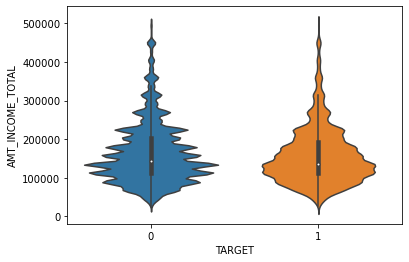

In [26]:
# violinplot
# x : 비교하려는 category 값
# y : 분포도를 보려는 column 값

# violinplot을 이용하면 Category 값별로 연속형 값의 분포도를 알수 있음. x는 category컬럼, y는 연속형 컬럼 
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt])

(<Figure size 864x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

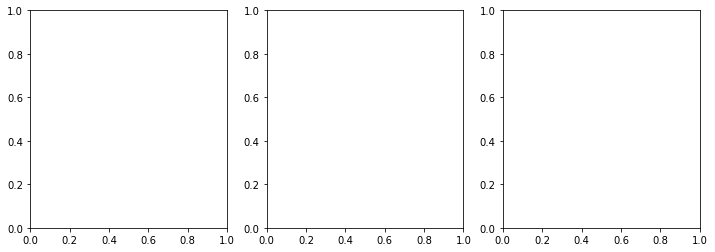

In [28]:
# plt.subplot 은 외울 것
# 여러개의 plot을 만들 때

plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

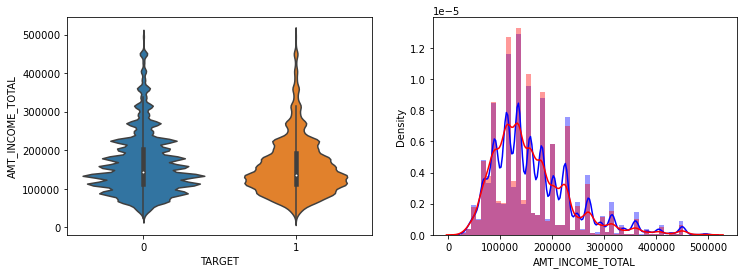

In [29]:
# plt.subplot 은 외울 것
# 여러개의 plot을 만들 때

fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
# fig : 전체 figure를 말함
# axs : 개별 subplot을 컨트롤 할 수 있는 축

# 1) displot
# TARGET값에 따른 Filtering 조건 각각 설정. 
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
# AMT_INCOME_TOTAL은 매우 큰 값이 있는데, 이는 제외.
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)
# distplot으로 TARGET=1이면 빨간색으로, 0이면 푸른색으로 Histogram 표현 
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='blue', ax=axs[0][1])
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='red', ax=axs[0][1])

# 2) violin
# violinplot을 이용하면 Category 값별로 연속형 값의 분포도를 알수 있음. x는 category컬럼, y는 연속형 컬럼 
# sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt])
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt], ax=axs[0][0])



In [ ]:
# 2개의 subplot을 생성
fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

In [ ]:
# TARGET 값 유형에 따른 Boolean Indexing 조건
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)
# 2개의 subplot을 생성하고  왼쪽에는 violinplot을 오른쪽에는 distplot을 표현
fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
# violin plot을 왼쪽 subplot에 그림. 
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt], ax=axs[0][0] )
# Histogram을 오른쪽 subplot에 그림. 
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label='0', color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label='1', color='red')

In [ ]:
def show_column_hist_by_target(df, column, is_amt=False):    
    cond1 = (df['TARGET'] == 1)
    cond0 = (df['TARGET'] == 0)

    fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
    # is_amt가 True이면 < 500000 조건으로 filtering
    cond_amt = True
    if is_amt:
        cond_amt = df[column] < 500000
    
    sns.violinplot(x='TARGET', y=column, data=df[cond_amt], ax=axs[0][0] )
    sns.distplot(df[cond0 & cond_amt][column], ax=axs[0][1], label='0', color='blue')
    sns.distplot(df[cond1 & cond_amt][column], ax=axs[0][1], label='1', color='red')

show_column_hist_by_target(app_train, 'AMT_INCOME_TOTAL', is_amt=True)

#### app_train과 app_test를 합쳐서 한번에 데이터 preprocessing 수행. 

In [30]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [31]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

In [33]:
# app_train의 TARGET 값을 Null로 입력됨. 

# (* value_counts는 dropna=True가 default => null 값을 아예 표시를 안해줌..)

apps['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64


#### Object feature들을 Label Encoding
* pandas의 factorize()를 이용


<br>

__(* "파이썬 머신러닝 완벽가이드"에서는 scikit-learn의 LabelEncoder를 썼음)__

LabelEncoder는 적어도 2줄인데, factorize()는 1줄이면 됨.


<br>

In [34]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [1]:
# 0)

apps.dtypes

In [35]:
# 1)

apps.dtypes[apps.dtypes == 'object']

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [36]:
# 2)
# 우리가 원하는 것은 dtype이 object인 column의 index

apps.dtypes[apps.dtypes == 'object'].index

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [37]:
# 3)
# 우리가 원하는 것은 dtype이 object인 column의 index
# 그런데 python의 list로 보고 싶다.

apps.dtypes[apps.dtypes == 'object'].index.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [38]:
# 4)
# Label 인코딩을 위해 object 유형의 컬럼만 추출 
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

In [42]:
# pd.factorize를 한번 보자

pd.factorize(apps['CODE_GENDER'])

(array([0, 1, 0, ..., 1, 0, 1]), Index(['M', 'F', 'XNA'], dtype='object'))

In [43]:
# CODE_GENDER의 M, F, XNA 값이 위의 Index 값이 됨.

apps['CODE_GENDER'].value_counts()

F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64

In [44]:
# array([0, 1, 0, ..., 1, 0, 1]) 이것만 필요함

pd.factorize(apps['CODE_GENDER'])[0]

array([0, 1, 0, ..., 1, 0, 1])

In [45]:
# pd.factorize()는 편리하게 Category 컬럼을 Label인코딩 수행. 
# pd.factorize(Category컬럼 Series)는 Label인코딩된 Series와 uniq한 Category값을 반환함. [0]을 이용하여 Label인코딩 Series만 취함. 
apps['CODE_GENDER'] = pd.factorize(apps['CODE_GENDER'])[0]

In [46]:
# 원래 object(16) => (15)로 변경

apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(41), object(15)
memory usage: 334.3+ MB


In [47]:
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [48]:
# pd.factorize + for loop

# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [49]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(56)
memory usage: 334.3 MB


#### Null값 일괄 변환

In [50]:
apps.isnull().sum().head(100)

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [51]:
# 이번에는 -999로 일괄 다 바꿀 것.
# 나중에는 아예 null값을 바꾸지 않을 것. 
# scikit-learn의 다른 estimator(classfier나 regressor)들은 이런 기능이 없지만,
# XgBoost나 LightBGM은 treemodel을 만들 때 null 값을 한쪽으로 다 밀어넣는다던가 하는 작업들을 하게 됨.


# -999로 모든 컬럼들의 Null값 변환
apps = apps.fillna(-999)

In [52]:
apps.isnull().sum().head(100)

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

#### 학습 데이터와 테스트 데이터 다시 분리

In [53]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET']== -999]
app_train.shape, app_test.shape

((307511, 122), (48744, 122))

In [54]:
# app_test의 TARGET컬럼을 Drop
app_test = app_test.drop('TARGET', axis=1)

In [55]:
app_test.shape

(48744, 121)

In [56]:
app_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 
* 피처용 데이터와 타겟 데이터 분리
* 학습용/검증용 데이터 세트 분리

In [64]:
# 1) 피처용 데이터와 타겟 데이터 분리

# feature용 데이터 : ftr_app
# lable(target)용 데이터 : target_app

# 'SK_ID_CURR' pk값도 필요없어서 drop

ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [65]:
# 2) 학습용/검증용 데이터 세트 분리

# -> LightGBM에서 evaluation기능이 있음. (학습 데이터 기반으로 학습을 하지만,
#    학습데이터로만 하면 overfitting이 되므로 evaluation 기능을 자체적으로 제공)


from sklearn.model_selection import train_test_split

# 학습용 feature : train_x
# 검증용 feature : valid_x
# 학습용 target : train_y
# 검증용 target : valid_y
# train_x, valid_x, train_y, valid_y = train_test_split() # shift + tab으로 parameter가 무엇이 들어가는지 확인.


# test_size가 검증용 데이터(valid_x)로 배분되는 비율(30%)
train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((215257, 120), (92254, 120))

In [66]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,  # 그냥 몇개 값만 집어 넣음
        subsample=0.8,  # 그냥 몇개 값만 집어 넣음
        max_depth=12,  # 그냥 몇개 값만 집어 넣음
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc', verbose= 100, early_stopping_rounds= 50) # verbose : verbose 100 할 때마다 출력하도록


Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.752205	training's binary_logloss: 0.250372	valid_1's auc: 0.744317	valid_1's binary_logloss: 0.251593
[200]	training's auc: 0.771473	training's binary_logloss: 0.243554	valid_1's auc: 0.754053	valid_1's binary_logloss: 0.247539
[300]	training's auc: 0.784885	training's binary_logloss: 0.239292	valid_1's auc: 0.757737	valid_1's binary_logloss: 0.246203
[400]	training's auc: 0.796336	training's binary_logloss: 0.235948	valid_1's auc: 0.758946	valid_1's binary_logloss: 0.245732
[500]	training's auc: 0.806016	training's binary_logloss: 0.233017	valid_1's auc: 0.759411	valid_1's binary_logloss: 0.24555
Early stopping, best iteration is:
[532]	training's auc: 0.808934	training's binary_logloss: 0.232125	valid_1's auc: 0.759548	valid_1's binary_logloss: 0.245494


LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

##### Feature importance 시각화 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

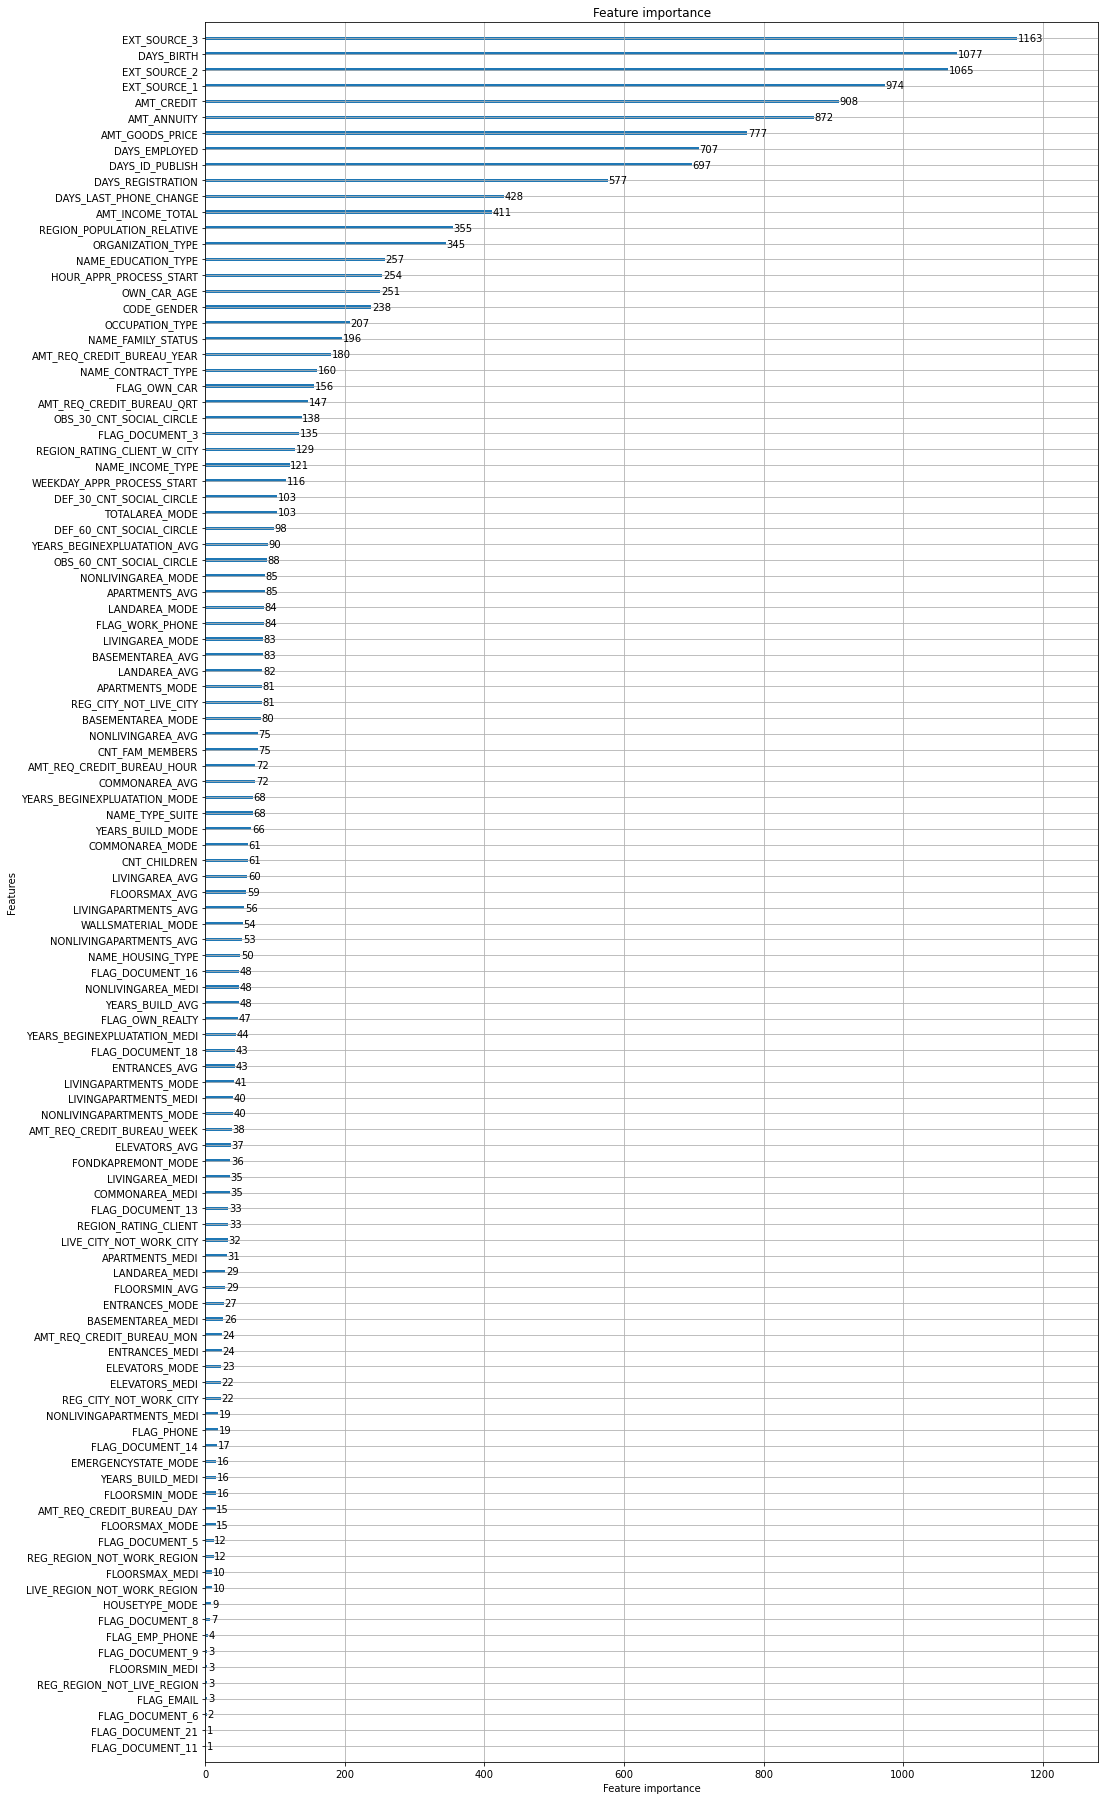

In [67]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [68]:
# clf.predict_proba(<test용 data>)

clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))

array([[0.97246502, 0.02753498],
       [0.87904013, 0.12095987],
       [0.98381082, 0.01618918],
       ...,
       [0.96802646, 0.03197354],
       [0.94283805, 0.05716195],
       [0.82020099, 0.17979901]])

#### 학습된 Classifier를 이용하여 테스트 데이터을 예측하고 결과를 Kaggle로 Submit 수행. 

In [70]:
#학습된 classifier의 predict_proba()를 이용하여 binary classification에서 1이될 확률만 추출

# (kaggle에서 1일 때 값만 요구하기 때문)

preds = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))[:, 1 ]

In [71]:
# app_test의 TARGET으로 1이될 확률 Update
app_test['TARGET'] = preds
app_test['TARGET'].head(10)

0    0.027535
1    0.120960
2    0.016189
3    0.037421
4    0.146077
5    0.036411
6    0.017445
7    0.041752
8    0.016933
9    0.087198
Name: TARGET, dtype: float64

In [72]:
# SK_ID_CURR과 TARGET 값만 csv 형태로 생성. 
app_test[['SK_ID_CURR', 'TARGET']].to_csv('app_baseline_01.csv', index=False)

In [73]:
!ls 

HomeCredit_columns_description.csv
OOF_All_01.ipynb
OOF_All_02.ipynb
POS_CASH_balance.csv
Pandas_Groupby_01.ipynb
Pandas_Join_01.ipynb
app_baseline_01.csv
app_baseline_01.ipynb
app_baseline_01_exercise.ipynb
app_baseline_02.ipynb
app_baseline_02_exercise.ipynb
application_test.csv
application_train.csv
bayesian_optimization_basic.ipynb
bureau.csv
bureau_balance.csv
bureau_baseline_01.ipynb
credit_card_balance.csv
hyper_param_tuning_01.ipynb
hyper_param_tuning_01_exercise.ipynb
installments_payments.csv
pos_installment_creditcard_baseline_01.ipynb
pos_installment_creditcard_baseline_02.ipynb
prev_baseline_01.ipynb
prev_baseline_01_exercise.ipynb
previous_application.csv
sample_submission.csv
